In [13]:
import pandas as pd
from IPython.display import SVG
from graphviz import Source
from random import randint
import pydot
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def get_dt_png(max_depth):

    df = pd.read_csv('PhishingData.csv')
    feature_cols = ['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address']

    X = df[feature_cols]
    y = df['Result']

    treeclf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    treeclf.fit(X, y)

    filename = f'dt{max_depth}'

    with open(f'{filename}.dot', 'w') as f:
        graph = Source(tree.export_graphviz(treeclf, out_file=f,
                                            feature_names=feature_cols,
                                            class_names=['-1', '0', '1'], filled = True))

    (graph,) = pydot.graph_from_dot_file(f'{filename}.dot')
    graph.write_png(f'{filename}.png')

get_dt_png(3)
get_dt_png(6)


[[158   2  18]
 [ 11   4  15]
 [ 11   2 118]]
              precision    recall  f1-score   support

          -1       0.88      0.89      0.88       178
           0       0.50      0.13      0.21        30
           1       0.78      0.90      0.84       131

    accuracy                           0.83       339
   macro avg       0.72      0.64      0.64       339
weighted avg       0.81      0.83      0.81       339



/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[[158   3  15]
 [  6   7  11]
 [ 11   3 125]]
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       176
           0       0.54      0.29      0.38        24
           1       0.83      0.90      0.86       139

    accuracy                           0.86       339
   macro avg       0.76      0.70      0.71       339
weighted avg       0.85      0.86      0.85       339



/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[[151  11  17]
 [  1  13  10]
 [  6   6 124]]
              precision    recall  f1-score   support

          -1       0.96      0.84      0.90       179
           0       0.43      0.54      0.48        24
           1       0.82      0.91      0.86       136

    accuracy                           0.85       339
   macro avg       0.74      0.77      0.75       339
weighted avg       0.86      0.85      0.85       339



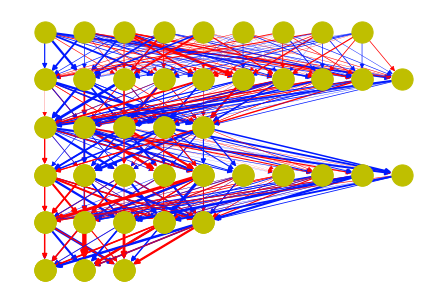

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import networkx as nx
import colorsys

def show_ann(mlp, layers):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    filename = f'nn{layers[0]}'
    if len(layers) > 1:
        for i in range(1, len(layers)):
            filename += f'_{layers[i]}'
    plt.savefig(f'{filename}.png', format='PNG')

def get_nn_png(layers):

    df = pd.read_csv('PhishingData.csv')
    X = df.drop('Result',axis=1)
    y = df['Result']

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=500)
    mlp.fit(X_train,y_train)

    predictions = mlp.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    show_ann(mlp, layers)

get_nn_png([5])
get_nn_png([5, 5, 5])
get_nn_png([10, 5, 10, 5])